<a href="https://colab.research.google.com/github/DevNicque/MyCods/blob/master/C%C3%B3pia_de_BEMOLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install unidecode

     |████████████████████████████████| 245kB 6.0MB/s 


In [31]:
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
from datetime import date, datetime


In [3]:
xlsx = pd.ExcelFile('Desafio - Relatório - Ass de Projetos.xlsx')
DadosQ1 = pd.read_excel(xlsx, 'Dados - Questão 1')
DadosQ2 = pd.read_excel(xlsx, 'Dados - Questão 2')

In [4]:
DadosQ1.head()

,num_compra,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
0,24937847,295,Daniel,12,Loja Armando Mendes,2019-01-06 11:53:01,129.120,2.603920,Sim
1,23600787,295,Daniel,12,Loja Manoa,2019-06-01 17:27:11,95.964,1.935274,Sim
2,24298956,295,Daniel,12,Loja Manoa,2019-06-22 16:40:21,506.052,10.205382,Sim
3,23802765,331,Alex,12,Loja Manoa,2019-06-11 20:10:43,586.200,11.821700,Sim
4,22559356,331,Alex,12,Loja Manoa,2019-05-14 19:26:41,57.864,1.166924,Sim


In [113]:
colunasSelecionadasDadosQ1 = ['num_compra','usuario', 'nome', 'Filial','valor_compra','data_compra']
SelecionadosDadosQ1 = DadosQ1.filter(items=colunasSelecionadasDadosQ1)

SelecionadosDadosQ1['usuario'] = SelecionadosDadosQ1['usuario'].astype(str)
SelecionadosDadosQ1['nome'] = SelecionadosDadosQ1['nome'].astype(str)

for index, row in SelecionadosDadosQ1.iterrows():
    SelecionadosDadosQ1.at[index,'vendedor'] =  row['usuario'] + ' - ' +  row['nome']


SelecionadosDadosQ1.head()

,num_compra,usuario,nome,Filial,valor_compra,data_compra,vendedor
0,24937847,295,Daniel,Loja Armando Mendes,129.120,2019-01-06 11:53:01,295 - Daniel
1,23600787,295,Daniel,Loja Manoa,95.964,2019-06-01 17:27:11,295 - Daniel
2,24298956,295,Daniel,Loja Manoa,506.052,2019-06-22 16:40:21,295 - Daniel
3,23802765,331,Alex,Loja Manoa,586.200,2019-06-11 20:10:43,331 - Alex
4,22559356,331,Alex,Loja Manoa,57.864,2019-05-14 19:26:41,331 - Alex


Análise de Quantidade de vendas por usuários (unidades)


In [106]:
df1 = SelecionadosDadosQ1.groupby(['Filial',"vendedor"]).size().reset_index(name="count").sort_values(by=["Filial",'count'], ascending=False)

df1.head()

,Filial,vendedor,count
1688,Loja Manoa,465620 - Alessandra,93
2164,Loja Manoa,703346 - leandro,59
1370,Loja Manoa,125079 - Adamastor,49
2281,Loja Manoa,796822 - Thiago,46
1371,Loja Manoa,12567 - Ruben,45


In [121]:
count = 0

data_dict = {'Filial': [language['Filial'][0]], 'Vendedor':[language['vendedor'][0]], 'Tot_Vendas':[language['count'][0]]}

for a,b,c in zip(language['Filial'],language['vendedor'],language['count']) :
    if count == 0:
      aux = a
      count +=1
    if not a == aux:
      aux = a
      data_dict['Filial'].append(a)
      data_dict['Vendedor'].append(b)
      data_dict['Tot_Vendas'].append(c)
    

data_dict

{'Filial': ['Loja Armando Mendes', 'Loja Cachoerinha', 'Loja Armando Mendes'],
 'Tot_Vendas': [1, 54, 78],
 'Vendedor': ['10055 - Marco', '842680 - Giselle', '466205 - Marina']}

In [101]:
count = 0
aux = language['Filial'][0]

data_dict = {'Filial': [language['Filial'][0]], 'Vendedor':[language['vendedor'][0]], 'Tot_Vendas':[language['count'][0]]}

for index, row in language.iterrows():
  if not row['Filial'] == aux:
      aux = row['Filial']
      data_dict['Filial'].append(row['Filial'])
      data_dict['Vendedor'].append(row['vendedor'])
      data_dict['Tot_Vendas'].append(row['count'])

data_dict


{'Filial': ['Loja Armando Mendes',
  'Loja Manoa',
  'Loja Cachoerinha',
  'Loja Armando Mendes'],
 'Tot_Vendas': [1, 93, 54, 78],
 'Vendedor': ['10055 - Marco',
  '465620 - Alessandra',
  '842680 - Giselle',
  '466205 - Marina']}

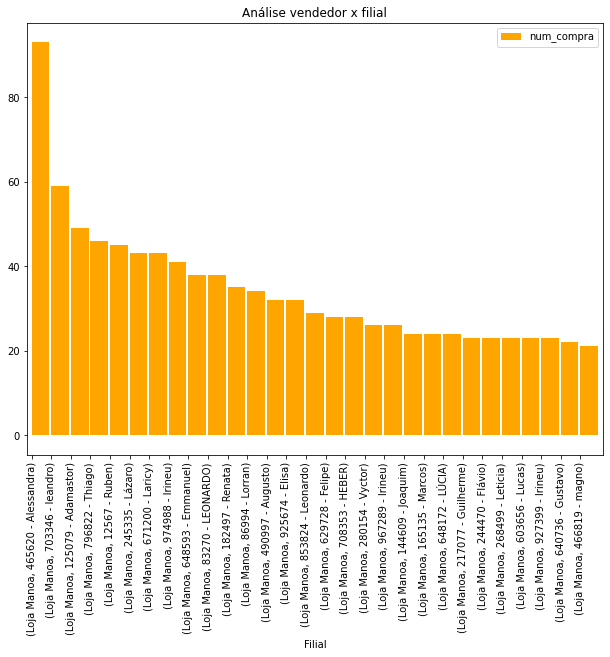

In [65]:
#Construção do Gráfico
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
a[0:29].plot(kind='bar', color ='orange', orientation='horizontal', align='edge',width = 0.9, ax=ax)
plt.xlabel('Filial')
plt.legend(loc = 'upper right')
plt.title('Análise vendedor x filial')
plt.show()

Análise de Vendas por Filial (unidades)

In [ ]:
SelecionadosDadosQ1['Filial'].value_counts()

In [ ]:
coluna_filial.describe()

count                12000
unique                   3
top       Loja Cachoerinha
freq                  4659
Name: Filial, dtype: object

////////

In [ ]:
microdadosQ1 = DadosQ1.filter(items=colunasSelecionadasQ1)

In [ ]:
microdadosQ1.head()

,Filial,valor_compra,usuario,nome
0,Loja Manoa,95.964,295,Daniel
1,Loja Manoa,506.052,295,Daniel
2,Loja Armando Mendes,129.120,295,Daniel
3,Loja Manoa,542.148,331,Alex
4,Loja Manoa,114.324,331,Alex


In [ ]:
grupoDadosQ1 = microdadosQ1.groupby(['usuario', 'nome', 'Filial']).sum(['valor_compra'])

In [ ]:
grupoDadosQ1.head()

valor_compra
usuario nome           Filial                           
295     Daniel         Loja Armando Mendes       129.120
                       Loja Manoa                602.016
331     Alex           Loja Manoa               2333.148
370     Pedro          Loja Manoa               1446.348
460     Maria Cristina Loja Manoa                185.736

In [ ]:
grupoDadosQ1.insert(loc=4, column = 'quantidade', value=cont_usuario)
grupoDadosQ1.head()

IndexError: ignored

In [ ]:
grupoDadosQ1.to_excel("grupoDadosQ1.xlsx")